Question 1: Find the centre of the nodes of the swimming route

First we find all the nodes of our swimming route, after that we can define the centre of the nodes (centroid)

[252142901, 331854233, 323929882, 60740166, 178249906, 60740168, 331960285, 178249904, 237852504, 237852501, 117738509, 178261156, 60740852, 5713701424]


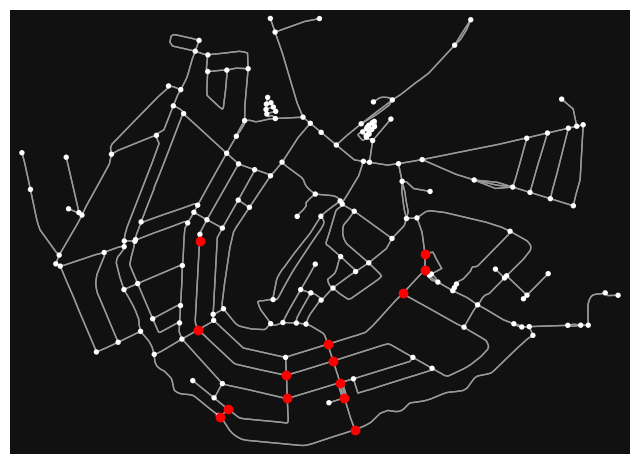

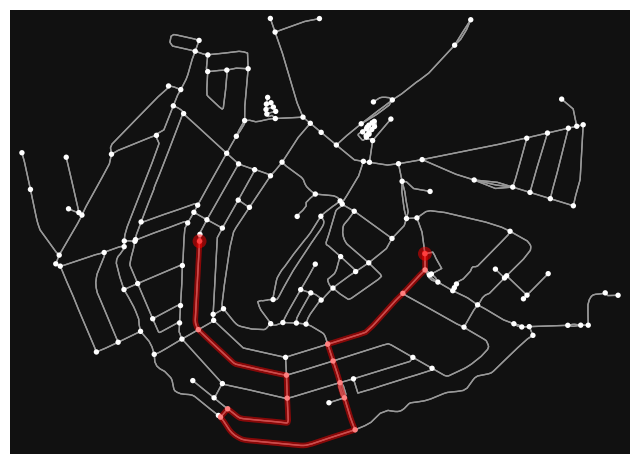

In [196]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Coordinates of our swimming route
coords = [(52.373277, 4.914874), (52.371396, 4.913133), (52.369416, 4.910271),
          (52.365890, 4.901659), (52.364576, 4.902343), (52.362704, 4.902773),
          (52.361792, 4.903786), (52.359224, 4.904724), (52.359252, 4.888917), 
          (52.360749, 4.888679), (52.360716, 4.896166), (52.362973, 4.895984),
          (52.366703, 4.885165), (52.372914, 4.887096)]

# Get the street network for Amsterdam city-centre, only the waterways!
north, south, east, west = 52.3911937, 52.3505111, 4.8618788, 4.9380764
G = ox.graph_from_bbox(north, south, east, west, network_type='all', simplify=True, custom_filter='["waterway"~"river|canal"]')

# Here we plot the network
ox.plot_graph(G, show=False, close=False)

# create an empty list to store the nodes found to use later for the route
all_nodes = []

# looping through the coordinates and plot nodes
for i in range(len(coords)):
    lat, lon = coords[i][0], coords[i][1]
    # Find the node closest to coordinate of the route
    node = ox.distance.nearest_nodes(G, lon, lat)
    all_nodes.append(node)

# Plot the node (in the loop)
    node_data = G.nodes[node]
    x, y = node_data['x'], node_data['y']
    plt.plot(x, y, 'ro', markersize=6)  

print(all_nodes)
#plotting the final route through the nearest nodes
path = all_nodes
pt = ox.graph_to_gdfs(G, edges=False).unary_union.centroid
fig, ax = ox.plot_graph_route(G, path)




Now the route is plotted and all the nodes are set, we can calculate the centre of the nodes (centroid)

In [176]:
#writing a function to generate the centroid by using all the coordinates
def find_centroid(coords):
    total_lat = sum(lat for lat, lon in coords)
    total_lon = sum(lon for lat, lon in coords)
    
    avg_lat = total_lat / len(coords)
    avg_lon = total_lon / len(coords)
    
    return avg_lat, avg_lon


In [177]:
#call the function and print the coordinates of the centroid
centroid = find_centroid(coords)
print(f"Centroid coordinates: {centroid}")

Centroid coordinates: (52.365113, 4.8996835714285725)


''

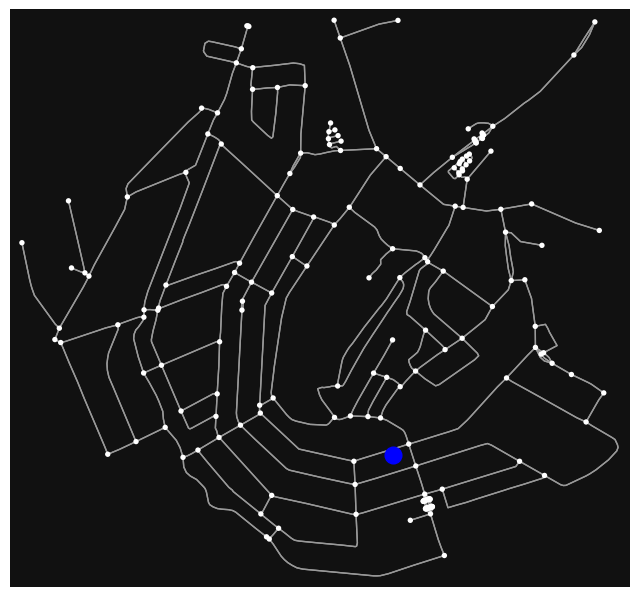

In [178]:
#load the amsterdam waterway map again
place_name = "Amsterdam, Netherlands"
G = ox.graph_from_address(place_name, network_type='all', dist=2000, custom_filter=['waterway'])


ox.plot_graph(G, show=False, close=False)

# Plot the centroid on the map
plt.plot(centroid[1], centroid[0], 'bo', markersize=12)  # Blue dot for centroid

;

Question 2: Use the centre to find a suitable spot for the Event Headquarters

In [191]:
from geopy.geocoders import Nominatim

#address of the exact location
lat = centroid[0]  
lon = centroid[1]  


geolocator = Nominatim(user_agent="geoapiExercises")

#reverse geocoding
location = geolocator.reverse(f"{lat}, {lon}", exactly_one=True)
address = location.address
print('The exact adress for the headquarters :', address)


The exact adress for the headquarters : 586A, Herengracht, Grachtengordel, Centrum, Amsterdam, Noord-Holland, Nederland, 1017 CJ, Nederland


Question 5: Calculate the centrality of the start, finish, and centre node of the route. Which
centrality calculation makes the most sense

We use centrality because then it is visible how closeby certain points are. We make use of the waterway map to calculate this, the organization will mostly will be in the headquarters and in this way they know how far points on the route are.

In [183]:
#beginpoint coordinates
begpoint_x = 4.914874 
begpoint_y = 52.373277
#endpoint coordinates
endpoint_x = 4.887096 
endpoint_y = 52.372914
#the center coordinates are calculated above with average x and y
center_x = centroid[1]
center_y = centroid[0]

place_name = "Nieuwmarkt 112, Amsterdam, Netherlands"
map = ox.graph_from_address(place_name, network_type='all', dist=2000, custom_filter=['waterway'])

#find nearest nodes
nearest_node = ox.distance.nearest_nodes(map, begpoint_x, begpoint_y, return_dist=True)
print(nearest_node)
nearest_node2 = ox.distance.nearest_nodes(map, endpoint_x, endpoint_y, return_dist=True)
print(nearest_node2)
nearest_center_node = ox.distance.nearest_nodes(map, center_x, center_y, return_dist=True)
print(nearest_center_node)

centrality_beg = nx.closeness_centrality(map, 252142901)
centrality_center = nx.closeness_centrality(map, 60740166)
centrality_end = nx.closeness_centrality(map,5713701424)
print()
print("The centrality of the beginning is", centrality_beg)
print('the centrality of the headquarter is', centrality_center)
print("The centrality of the finish is", centrality_end)


(252142901, 109.12753037207415)
(5713701424, 168.60491308553287)
(60740166, 127.32349373231014)

The centrality of the beginning is 0.12170860152135751
the centrality of the headquarter is 0.14689265536723164
The centrality of the finish is 0.12659768715763847
